## Lecture 4 - Scikit-learn API (Part 1)

** Assignment: Classification and regression with a common API **

Instructions:

- Use scikit-learn estimators and the .fit / .predict pattern
- Compare models on the same dataset
- Add short comments explaining results

### Task 1: Dataset and split

Load a dataset and create a reproducible train/test split.


In [1]:
# TODO: Load a dataset (iris, breast_cancer, or diabetes)
from sklearn.datasets import load_iris, load_diabetes

# In production,
# data = pd.load_csv('filename.csv')
# but the data may need more preprocessing.
# With ready-made datasets, preprocessing is rarely needed,
# but EDA is still very important!

# If you have good ETL / data engineers, the data can be usable from the start.
data = load_iris(as_frame=True)

In [2]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = data.data
y = data.target
target_names = data.target_names

print("X:", X)
print("y:", y)

X:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
y: 0      0
1      0
2      0
3      

In [5]:
# TODO: Create train/test split with a fixed random_state

# Here we often use a function (train_test_split)
# The function splits our data neatly into piles of train and test
# We could do this manually

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [6]:
# One thing to keep in mind.
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)

X_train shape: (100, 4) X_test shape: (50, 4)


In [7]:
# It’s good to double-check that you still have all classes 
# from the entire dataset after splitting the data. 
# You can be unlucky with the split.

y_train.value_counts()

target
1    35
2    34
0    31
Name: count, dtype: int64

### An EDA step: we examine the data using plotting/visualization.


In [8]:
# Slice examples

# list[:] - retrieves all data
# that is: [:] in a slice means everything
print(X[:])

# But : can be modified, we can retrieve all data before
# or after a certain point

# [12:] retrieves all data from row 12 and downward
X[12:]

# [:12] retrieves all data up to row 12
X[:12]

# We can also slice in more than one dimension
# We do this by using a comma
# for example: [[1,2,3],[4,5,6]]

# Let's try

# Note: with a DataFrame, we use iloc for slicing instead
# of just brackets [], but the principle is the same.
X.iloc[:, 1]

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

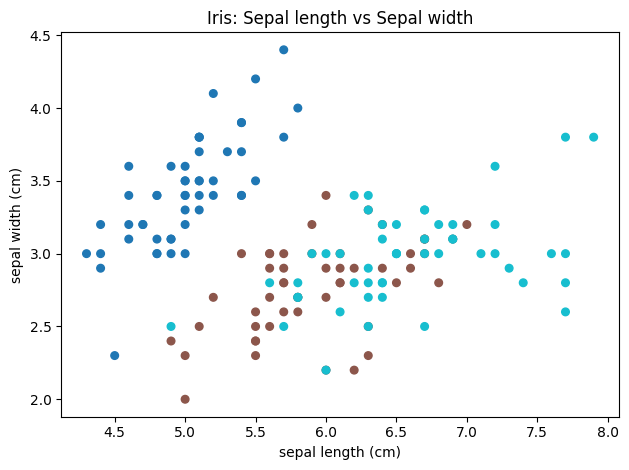

In [9]:
import matplotlib.pyplot as plt

# With plt.plot() we can plot data
# plot() takes data in list form, which can be passed 
# in different ways

# With plt.plot(), we create a line plot
# Line plots have many settings
# You can explore them when you need to plot
# The "o" is an example of a setting
# It makes us plot points instead of lines
# plt.plot(X, y, "o")

# Our data is high-dimensional (4 dimensions),
# so we choose to plot two dimensions
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap="tab10", s=30)

plt.title("Iris: Sepal length vs Sepal width")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.tight_layout()
plt.show()

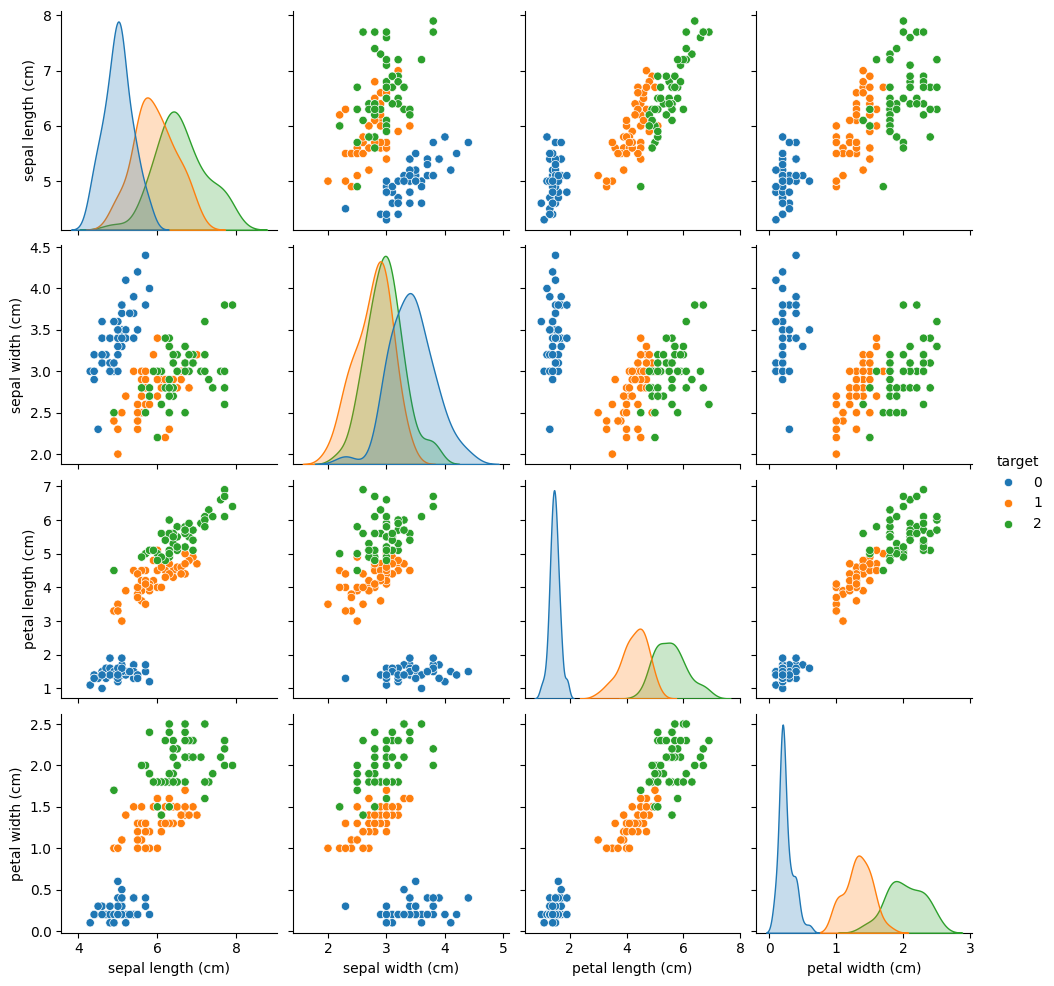

In [10]:
import seaborn as sns

# Seaborn pairplot example
# Seaborn is a good complement to matplotlib.
# A very common use case is pairplot.
# Pairplot plots high-dimensional data, broken down into
# pairs of two dimensions, AS WELL AS the distribution of
# all variables (histograms).

sns.pairplot(data=data.frame, hue="target", vars=data.feature_names, palette="tab10")
plt.show()


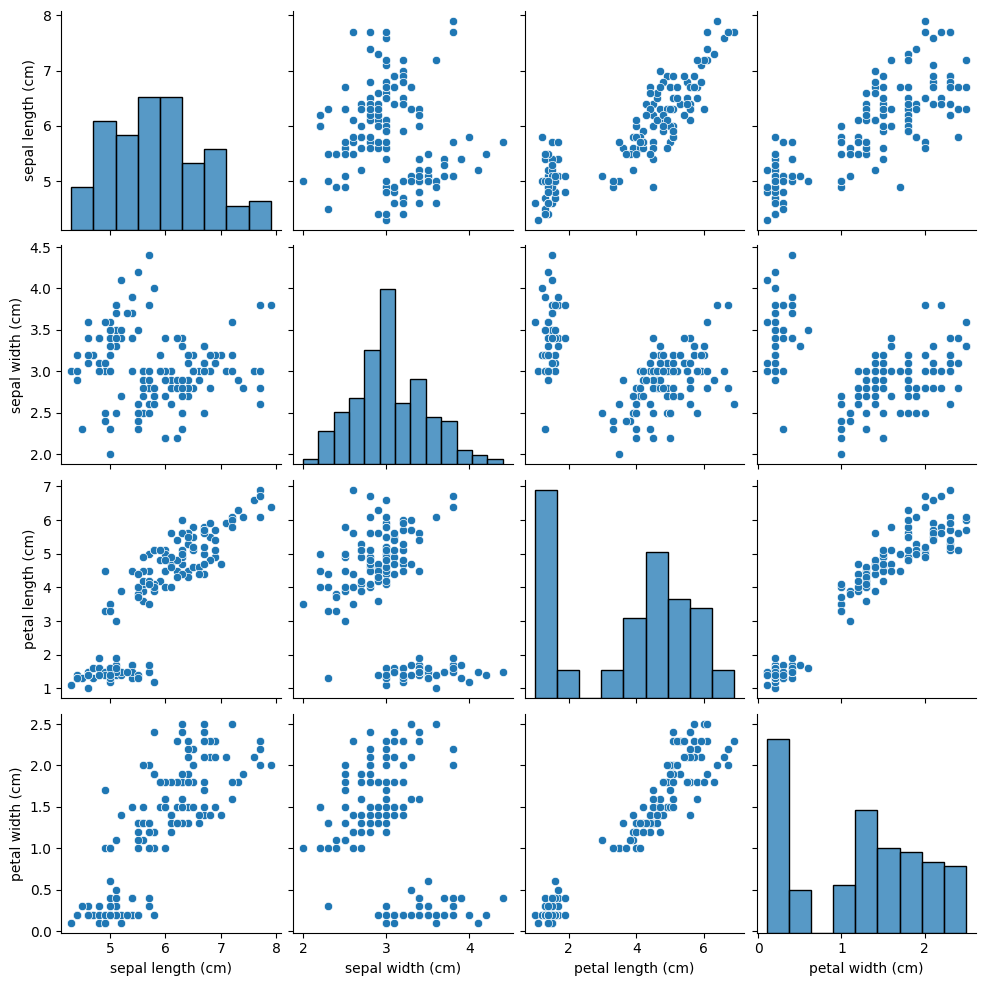

In [11]:
sns.pairplot(data=data.data)
plt.show()

### Task 2: Two models, same API

Train two models and use the same fit/predict workflow.


In [12]:
# TODO: Train LogisticRegression (classification) OR LinearRegression (regression)
from sklearn.linear_model import LogisticRegression

# First, we create a completely empty model
LogReg = LogisticRegression(max_iter=100)

# Then we fit it to our data
# We train it: it tries to find relationships
# between our X (features) and y (target)
LogReg.fit(X_train, y_train)

# We evaluate our model using test data
y_pred = LogReg.predict(X_test)

Our accuravy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



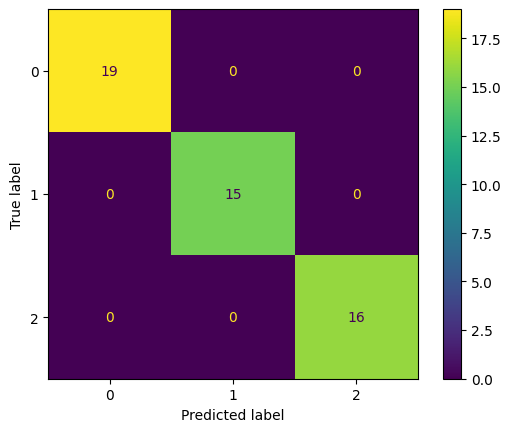

In [13]:
# TODO: Train SVC (classification) OR Ridge (regression)

# We create an additional classification model in order to compare different ones.
# In machine learning in general, this is very common and almost necessary.
# We usually train many models for the same purpose and then compare them.
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
svc = SVC()

# We do the same steps as above (for Logistic Regression).
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("Our accuravy is: ", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

confusion_matrix3=confusion_matrix(y_test,y_pred_svc)
ConfusionMatrixDisplay(confusion_matrix3).plot()

In [14]:
# Task 2: Two models, same API (classification)
# Use two different classifiers on the same dataset

# The below is a standard way of training several models 
# of the same kind at the same time
log_reg = LogisticRegression(max_iter=10000)
svm_mod = SVC()

print("\nClassification models on Iris")
for model in [log_reg, svm_mod]:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"--- {model.__class__.__name__} ---")
    # Macro-average treats each class equally (good for multiclass)
    print("Our accuravy is: ", accuracy_score(y_test, preds))



Classification models on Iris
--- LogisticRegression ---
Our accuravy is:  1.0
--- SVC ---
Our accuravy is:  1.0


### Task 2 - Regression Continuation
Below we continue with task 2, but now we will use two different regression models and compare their performance.

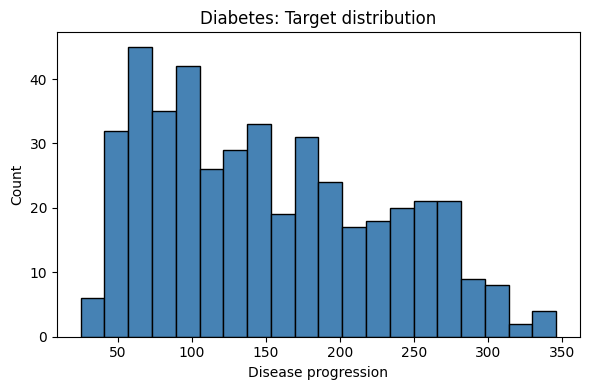

In [15]:
# PREP: Doing the same as above, but for another dataset

# Regression dataset: Diabetes
diabetes = load_diabetes(as_frame=True)
X_reg = diabetes.data
y_reg = diabetes.target

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Diabetes: histogram of target values
plt.figure(figsize=(6, 4))
plt.hist(y_reg, bins=20, color="steelblue", edgecolor="black")
plt.title("Diabetes: Target distribution")
plt.xlabel("Disease progression")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [16]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

### Task 3: Metrics
Compute evaluation metrics and add a short comparison.          

Our accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



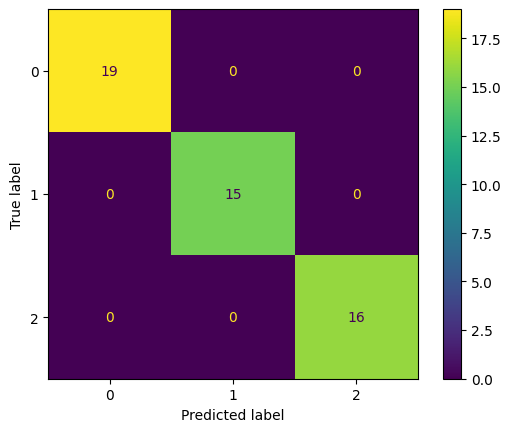

In [17]:
# TODO: For classification: accuracy, precision, recall, f1
# We evaluate our model by comparing predictions to actual values
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Our accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix2=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix2).plot()

In [18]:
# TODO: For regression: MAE and R2

# Se ovan, vi gör utvärderingen i regressions-träningsloopen
# TODO: Print a short comparison and comment on which model you prefer
print("Done! You practiced the unified scikit-learn API.")


Done! You practiced the unified scikit-learn API.


## BONUS: Plotting decision boundaries (classification)


In [19]:
# Now we train Regression models on this data, we 
# will try to predict disease progression for our 
# diabetes patients

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import (
    mean_absolute_error,
    r2_score,
)

LinReg = LinearRegression()
ridge = Ridge() # we could add alpha and a solver here

y_reg_pred = []
for model in [LinReg, ridge]:
    model.fit(X_reg_train, y_reg_train)

    # Att spara värden från träning för mer analys (som nedan)
    # är väldigt användbart
    y_reg_pred.append(model.predict(X_reg_test))
    
    y_pred = model.predict(X_reg_test)
    print(f"--- {model.__class__.__name__} ---")
    print("Mean absolute error:", mean_absolute_error(y_reg_test, y_pred))
    print("r2 score:", r2_score(y_reg_test, y_pred))

--- LinearRegression ---
Mean absolute error: 42.79409467959994
r2 score: 0.4526027629719198
--- Ridge ---
Mean absolute error: 46.13885766697452
r2 score: 0.41915292635986545


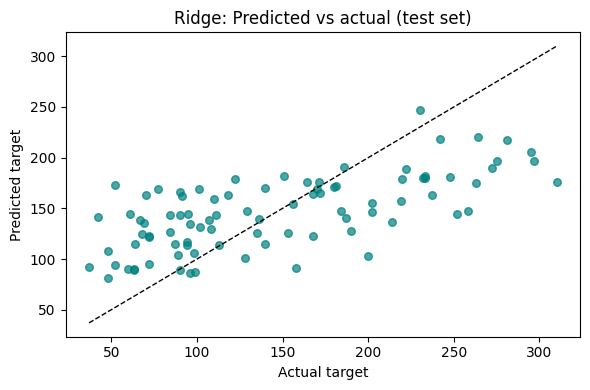

In [20]:
# BONUS: Plot Ridge predictions vs actual (good regression diagnostic)
plt.figure(figsize=(6, 4))
plt.scatter(y_reg_test, y_reg_pred[1], color="teal", s=30, alpha=0.7)
min_val = min(y_reg_test.min(), y_reg_pred[0].min())
max_val = max(y_reg_test.max(), y_reg_pred[0].max())
plt.plot([min_val, max_val], [min_val, max_val], "k--", linewidth=1)
plt.title("Ridge: Predicted vs actual (test set)")
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.tight_layout()
plt.show()